<a href="https://colab.research.google.com/github/joony0512/Deep_Learning_Class/blob/main/Part2/P2_Ch02_CH07_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression with Mini-Batches

In [6]:
import numpy as np
x = np.array([1,2,3,])
# print(x)
# print(np.diag(x))

M = np.random.normal(0,1, (2,3))
N = np.random.normal(0,1, (3,4))
print(np.matmul(M, N).round(3))
print((M @ N).round(3))

[[ 0.95   0.822 -0.077 -0.089]
 [ 1.381  1.595  0.54  -0.303]]
[[ 0.95   0.822 -0.077 -0.089]
 [ 1.381  1.595  0.54  -0.303]]


In [46]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
np.random.seed(0)
plt.style.use('seaborn') 

# set params
N, n_feature = 300, 5
lr = 0.03
epochs = 30
b_size = 32
t_W = np.random.uniform(-1, 1, (n_feature, 1))
t_b = np.random.uniform(-1, 1, (1, ))
W = np.random.uniform(-1, 1, (n_feature, 1))
b = np.random.uniform(-1, 1, (1, 1))

n_batch = N // b_size
# print(t_W.shape, W.shape)
# print(t_b.shape, b.shape)

#generate dataset
x_data = np.random.randn(N, n_feature) # 이미 트랜스포즈 돼있는 상태이다.
y_data = x_data @ t_W + t_b

J_track= list()
W_track, b_track = list(), list()
for epoch in range(epochs):
  for b_idx in range(n_batch):
    W_track.append(W)
    b_track.append(b)

    #Get Mini-Batch
    X = x_data[b_idx*b_size : (b_idx + 1)*b_size, ...] # ... --> 전부다
    Y = y_data[b_idx*b_size : (b_idx + 1)*b_size, ...]
    # print(X.shape, Y.shape)

    #forward propagation
    Pred = X @ W + b
    J0 = (Y - Pred)**2
    J = np.mean(J0)
    J_track.append(J)

    #Jacobians
    dJ_dJ0 = 1/b_size*np.ones((1,b_size))
    # print(Y.shape, Pred.shape)
    dJ0_dPred = np.diag(-2*(Y-Pred).flatten())
    # print(dJ0_dPred.shape)
    dPred_dW = X #tensorflow에서는 이미 X.T임
    dPred_db = np.ones((b_size,1))

    #Backpropaation
    # print(dJ_dJ0.shape, dJ0_dPred.shape)
    dJ_dPred = dJ_dJ0 @ dJ0_dPred 
    # print(dJ_dPred.shape, dPred_dW.shape)
    dJ_dW = dJ_dPred @ dPred_dW
    # print(dJ_dPred.shape, dPred_db.shape)
    dJ_db = dJ_dPred @ dPred_db

    #Parameter Update
    
    W = W - lr*dJ_dW.T
    b = b - lr*dJ_db
    # print(W.shape, dJ_dW.shape)
    # print(b.shape, dJ_db.shape)

W_track = np.hstack(W_track)
print(W_track.shape)
b_track = np.concatenate(b_track)

(5, 270)


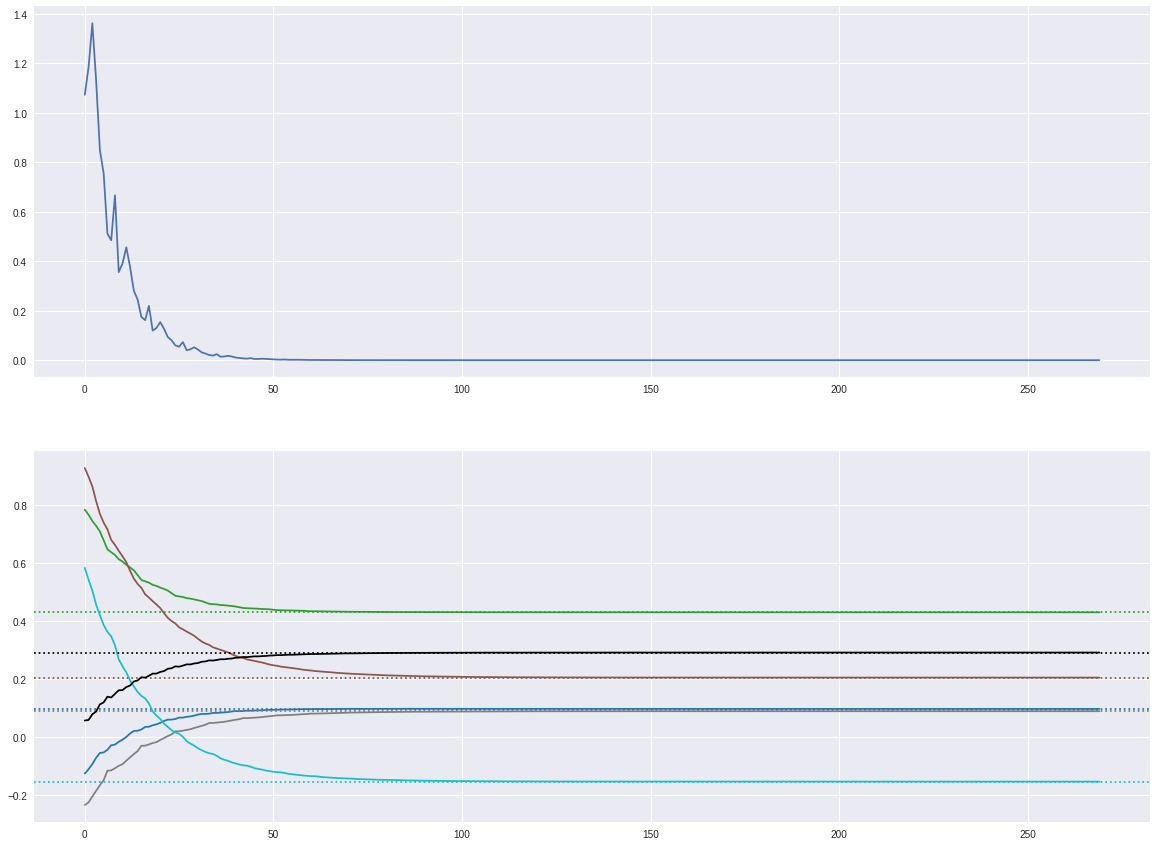

In [55]:
#Visualization

cmap = cm.get_cmap('tab10', n_feature) #tab10 = 기본색상 10개
fig, axes = plt.subplots(2,1 , figsize = (20,15))
axes[0].plot(J_track)

for w_idx, (t_w, w_track) in enumerate(zip(t_W, W_track)):
  axes[1].axhline(y=t_w, linestyle =':', color = cmap(w_idx))
  axes[1].plot(w_track, color = cmap(w_idx))

axes[1].axhline(y=t_b, linestyle = ':', color ='black')
axes[1].plot(b_track, color = 'black')
